In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
from math import *
np.random.seed(123)
import urllib.request
import urllib, os

In [2]:
import pandas as pd
import xarray as xr
import math
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
import numpy as np
import xarray as xr
import xesmf as xe

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
ds = xr.open_dataset(r'/home/shubham/ugp/cl_new/Grace_2002-2021.nc')

In [6]:
ds    

<xarray.Dataset>
Dimensions:        (time: 236, y: 180, x: 360)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-01 2002-05-01 ... 2021-11-01
  * x              (x) int64 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * y              (y) float64 -90.0 -89.0 -88.0 -87.0 ... 86.0 87.0 88.0 89.0
Data variables:
    lwe_thickness  (time, y, x) float64 ...

In [7]:
per = pd.DatetimeIndex(ds.time).to_period("M")
per

PeriodIndex(['2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
             '2002-10', '2002-11', '2002-12', '2003-01',
             ...
             '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
             '2021-08', '2021-09', '2021-10', '2021-11'],
            dtype='period[M]', length=236)

In [8]:
(per)

PeriodIndex(['2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
             '2002-10', '2002-11', '2002-12', '2003-01',
             ...
             '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
             '2021-08', '2021-09', '2021-10', '2021-11'],
            dtype='period[M]', length=236)

In [10]:
l = []
for i in range(13):
    l.append(ds.lwe_thickness[per.month == i])
    

In [12]:
l[1]

<xarray.DataArray 'lwe_thickness' (time: 19, y: 180, x: 360)>
[1231200 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01 2004-01-01 ... 2021-01-01
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
  * y        (y) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 86.0 87.0 88.0 89.0

In [15]:
l[0]['lwe_thickness'][0][:][:]

KeyError: 'lwe_thickness'

In [30]:
f = []
for i in range(1, 13):
    k = []
    for j in range(1, len(l[i])):
        k.append(l[i][j][:][:].mean())
    f.append(k)

In [31]:
for i in range(0, len(f)):
    print(np.array(f[i]))

[-0.11333132 -0.38337931 -0.28010444 -0.57578262 -0.64288249 -0.64112641
 -0.95391835         nan -1.43193897 -1.3803794  -1.53764273 -1.97552898
 -1.69969998 -2.15117952         nan -2.13288015 -2.12698611 -2.68009474]
[-0.01665239 -0.44691306 -0.28022991  0.28985705 -0.20709351 -0.44694813
 -0.87368853 -0.2424502  -1.34235972 -1.24548627         nan -1.99492453
 -1.89406752         nan         nan -1.90690842 -2.07409414 -1.93114939]
[ 0.25849867  0.04555738 -0.04809358 -0.31437308 -0.30829032 -0.57942951
 -0.43417556 -1.08843081 -1.11421183         nan -1.25469551 -1.60613662
 -1.52348559 -1.62612375         nan -1.67085596 -1.6275028  -2.02124286]
[ 0.87204562  0.28712278  0.34499723  0.08639543 -0.07780206  0.20734044
 -0.39995615 -0.40841638 -0.38306181 -0.83161145 -0.91585845 -1.00270335
 -1.32775409         nan -1.48261891         nan -1.15801023 -1.90084354
 -2.29033286]
[ 0.76107532  0.44879928  0.32159214  0.24328112  0.27140999  0.3410701
  0.00489198 -0.0902549  -0.3858972

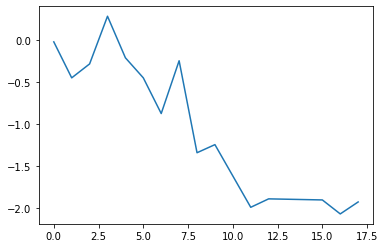

In [34]:
A = np.array(f[1])
a = np.interp(np.arange(len(A)), 
          np.arange(len(A))[np.isnan(A) == False], 
          A[np.isnan(A) == False])
plt.plot(a)

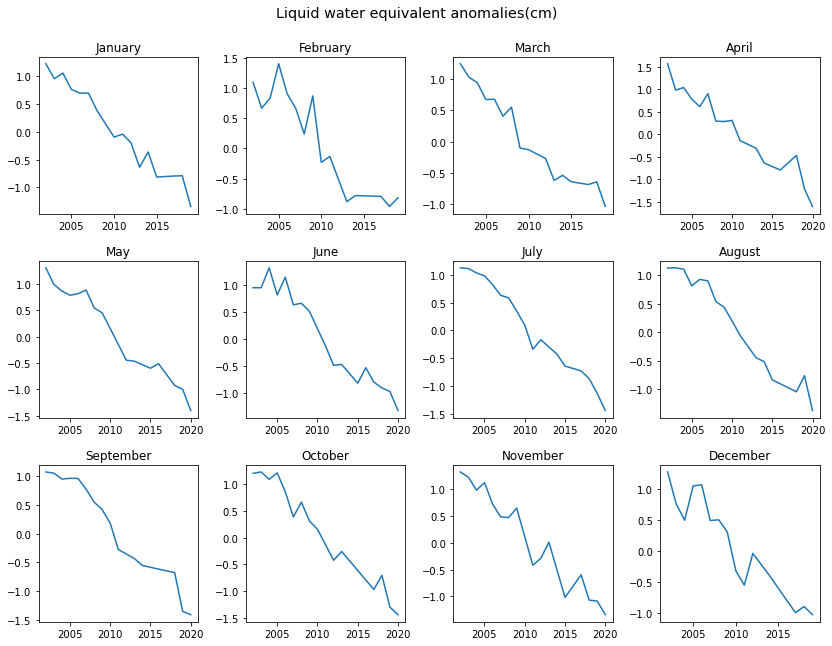

<Figure size 432x288 with 0 Axes>

In [101]:
import datetime
fig = plt.figure(figsize = (14, 10))
fig.suptitle("Liquid water equivalent anomalies(cm)", fontsize = 'x-large')
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.title(datetime.date(1900, i , 1).strftime('%B'))
    A = np.array(f[i - 1])
    a = np.interp(np.arange(len(A)), 
          np.arange(len(A))[np.isnan(A) == False], 
          A[np.isnan(A) == False])
    mea = a.mean()
    plt.plot(np.array(range(2002, 2002 + len(a))), a-mea)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
fig.subplots_adjust(top=0.91)
plt.show()
plt.savefig('grace.png')